In [ ]:
import csv
import time
import datetime
import json
import sys
import pandas as pd
import numpy as np

In [ ]:
# Installations
import sys
if 'google.colab' in sys.modules:
    !pip install emoji --upgrade
    !pip install pandas-profiling==2.*
    !pip install plotly==4.*
    !pip install pyldavis
    !pip install gensim
    !pip install chart_studio

     |████████████████████████████████| 175 kB 5.2 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=9824daec1b60888b9d3497c8ac4740bdbd46cf22f2a546934f92104a143d14ea
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji
     |████████████████████████████████| 245 kB 5.1 MB/s 
     |████████████████████████████████| 690 kB 62.1 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 4.7 MB 47.8 MB/s 
     |████████████████████████████████| 102 kB 77.6 MB/s 
     |████████████████████████████████| 812 kB 59.0 MB/s 
     |████████████████████████████████| 38.1 MB 313 kB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=81ee0de6441090b199c4d3cc19f5717b60f86ee876ae86b7a33191f18087d01e
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655

# data read

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def get_ID_list(txtPath):
    ID_lists = []
    with open(txtPath, 'r') as f:
        lines = f.readlines()
    for line in lines:
        line = line.strip('\n')
        ID_lists.append(line.split(','))
    return ID_lists

def get_label_list(txtPath):
    label_list = []
    with open(txtPath, 'r') as f:
        lines = f.readlines()
    for line in lines:
        label_list.append(line.strip('\n').split(',')[1])
    return label_list

def get_timestamp(time_str):
    return time.mktime(datetime.datetime.strptime(time_str, "%Y-%m-%dT%H:%M:%S.%fZ").timetuple())

def get_hashtag(tweet_object):
    if 'entities' in tweet_object.keys():
        if 'hashtags' in tweet_object['entities'].keys():
            hashtag_list = []
            for elem in tweet_object['entities']['hashtags']:
                hashtag_list.append(elem['tag'])
            return hashtag_list
    return None

In [ ]:
ID_list = get_ID_list('drive/MyDrive/task2/covid_new.txt')
label_list = get_label_list('drive/MyDrive/task2/covid.predictions.txt')[1:]
assert len(ID_list)==len(label_list)

openTrainData = open('drive/MyDrive/task2/covid.json')
covid_dict = json.load(openTrainData)
openTrainData.close()

In [ ]:
for row_index in range(len(ID_list)):
    for tweetid in ID_list[row_index]:
        covid_dict[tweetid]['label'] = label_list[row_index]
        covid_dict[tweetid]['timestamp'] = get_timestamp(covid_dict[tweetid]['created_at'])
        covid_dict[tweetid]['hashtags'] = get_hashtag(covid_dict[tweetid])

In [ ]:
assert len(list(covid_dict.keys()))==201839

In [ ]:
covid_df = pd.DataFrame.from_dict(covid_dict, orient='index',
                       columns=['text', 'lang','hashtags', 'timestamp', 'source', 'created_at', 'author_id', 'label'])
covid_df.head()

text lang  \
1272262651100434433  According to the New York Times, Warner Bros. ...   en   
1287153210990395392  Hurricane Hanna has made landfall in Texas.\n\...   en   
1287191952115605505  @TexasTribune Guess what the cause of death is...   en   
1266555444283179008  Monkeys on the loose in India with stolen coro...   en   
1258212704961155073  @BelAkinyii Let's not play blind that the work...   en   

                    hashtags     timestamp              source  \
1272262651100434433  [Tenet]  1.592166e+09  Twitter for iPhone   
1287153210990395392     None  1.595716e+09       Sprout Social   
1287191952115605505     None  1.595725e+09  Twitter for iPhone   
1266555444283179008     None  1.590805e+09          SocialFlow   
1258212704961155073     None  1.588816e+09     Twitter Web App   

                                   created_at            author_id label  
1272262651100434433  2020-06-14T20:20:28.000Z  1011312260805996547     0  
1287153210990395392  2020-07-25T22:30:14.000Z             44513878     0  
1287191952115605505  2020-07-26T01:04:10.000Z  1266937699128217602     0  
1266555444283179008  2020-05-30T02:22:04.000Z              1917731     0  
1258212704961155073  2020-05-07T01:50:59.000Z  1170754239272050688     0

In [ ]:
covid_df.info

<bound method DataFrame.info of                                                                   text lang  \
1272262651100434433  According to the New York Times, Warner Bros. ...   en   
1287153210990395392  Hurricane Hanna has made landfall in Texas.\n\...   en   
1287191952115605505  @TexasTribune Guess what the cause of death is...   en   
1266555444283179008  Monkeys on the loose in India with stolen coro...   en   
1258212704961155073  @BelAkinyii Let's not play blind that the work...   en   
...                                                                ...  ...   
1265875761111666688  @seanhannity Trump total meltdown Coronavirus ...   en   
1265822646215872514  @seanhannity New York Post- January 5, 2020 " ...   en   
1265936765988286465  @seanhannity Everything was fine before COVID-...   en   
1265825373868228608  @seanhannity Sad to say, NY and NYC are train ...   en   
1265813858318454785  @seanhannity Breaking News: What Fox News won'...   en   

                   

In [ ]:
covid_en_df = covid_df[covid_df.lang=='en']

In [ ]:
covid_en_df.info

<bound method DataFrame.info of                                                                   text lang  \
1272262651100434433  According to the New York Times, Warner Bros. ...   en   
1287153210990395392  Hurricane Hanna has made landfall in Texas.\n\...   en   
1287191952115605505  @TexasTribune Guess what the cause of death is...   en   
1266555444283179008  Monkeys on the loose in India with stolen coro...   en   
1258212704961155073  @BelAkinyii Let's not play blind that the work...   en   
...                                                                ...  ...   
1265875761111666688  @seanhannity Trump total meltdown Coronavirus ...   en   
1265822646215872514  @seanhannity New York Post- January 5, 2020 " ...   en   
1265936765988286465  @seanhannity Everything was fine before COVID-...   en   
1265825373868228608  @seanhannity Sad to say, NY and NYC are train ...   en   
1265813858318454785  @seanhannity Breaking News: What Fox News won'...   en   

                   

# rumor/norumor split

In [ ]:
covid_rm = covid_en_df[covid_en_df.label=='1']
covid_nr = covid_en_df[covid_en_df.label=='0']
print(f'rumor number: {len(covid_rm)}, no rumor number: {len(covid_nr)}')

rumor number: 35895, no rumor number: 165595


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter, defaultdict
from copy import deepcopy
from nltk.stem import WordNetLemmatizer

In [ ]:
hashtag_list = covid_en_df["hashtags"].values.tolist()
rumor_hashtag_list = covid_en_df.loc[covid_en_df["label"] == '1']["hashtags"].values.tolist()
norumor_hashtag_list = covid_en_df.loc[covid_en_df["label"] == '0']["hashtags"].values.tolist()

In [ ]:
import nltk
nltk.download('wordnet')

def to_hashtag_dict(list):
    
    lemmatizer = WordNetLemmatizer()
    hashtagdict = defaultdict(int)
    for row in list:
        if not row is None:
            for hashtag in row:
                hashtagdict[lemmatizer.lemmatize(hashtag.lower())]+=1
    return hashtagdict

HASHTAGS_POPLIST = ['covid19', 'coronavirus', 'coronaviruspandemic', 'covid_19', 'covid', 
                   'pandemic', 'corona', 'covid19pandemic', 'covidー19', 'covid__19', 'covid2019']

def pop_hashtag(dict1, poplist=HASHTAGS_POPLIST):
    tdict = deepcopy(dict1)
    for k in dict1.keys():
        if k in HASHTAGS_POPLIST:
            tdict.pop(k)
    return tdict

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
hashtag_dict = to_hashtag_dict(hashtag_list)
rumor_hashtag_dict = to_hashtag_dict(rumor_hashtag_list)
norumor_hashtag_dict = to_hashtag_dict(norumor_hashtag_list)

hashtag_dict = pop_hashtag(hashtag_dict)
rumor_hashtag_dict = pop_hashtag(rumor_hashtag_dict)
norumor_hashtag_dict = pop_hashtag(norumor_hashtag_dict)

hashtag_sorted = [[item[0], item[1]] for item in sorted(hashtag_dict.items(), key=lambda item: item[1], reverse=True)] 
rumor_hashtag_sorted = [[item[0], item[1]] for item in sorted(rumor_hashtag_dict.items(), key=lambda item: item[1], reverse=True)] 
norumor_hashtag_sorted = [[item[0], item[1]] for item in sorted(norumor_hashtag_dict.items(), key=lambda item: item[1], reverse=True)]


# Hashtags analysis

What are the popular hashtags of COVID-19 rumours and non-rumors.

## frequency

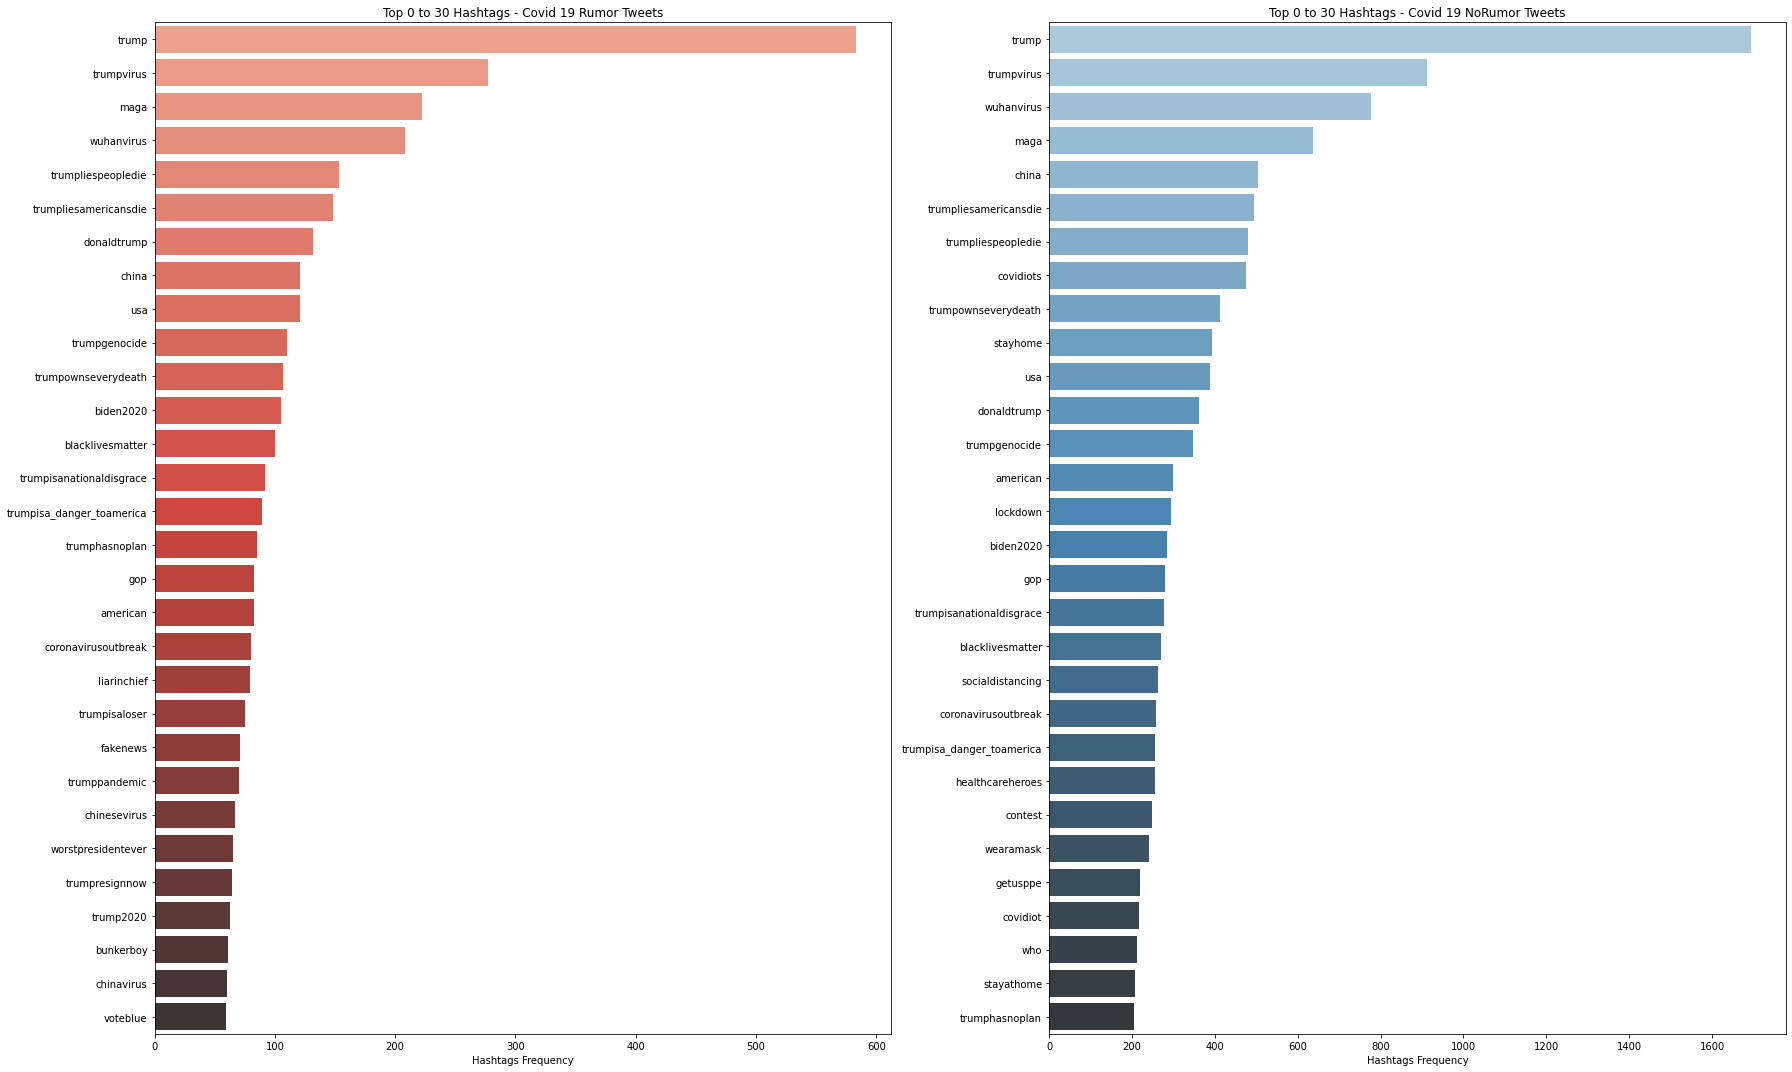

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(25,15))
START_INDEX = 0
END_INDEX = 30

sns.barplot(y=[i[0] for i in rumor_hashtag_sorted][START_INDEX:END_INDEX], 
            x=[i[1] for i in rumor_hashtag_sorted][START_INDEX:END_INDEX], 
            orient='h', ax=ax[0], palette="Reds_d")

sns.barplot(y=[i[0] for i in norumor_hashtag_sorted][START_INDEX:END_INDEX], 
            x=[i[1] for i in norumor_hashtag_sorted][START_INDEX:END_INDEX], 
            orient='h', ax=ax[1], palette="Blues_d")

ax[0].set_title(f"Top {START_INDEX} to {END_INDEX} Hashtags - Covid 19 Rumor Tweets")
ax[0].set_xlabel("Hashtags Frequency")
ax[1].set_title(f"Top {START_INDEX} to {END_INDEX} Hashtags - Covid 19 NoRumor Tweets")
ax[1].set_xlabel("Hashtags Frequency")
plt.tight_layout()
plt.show()

## Proportion

判断标准是自己定义的，所以没有统计学依据，可以忽略这种方法，直接用3.3的卡方检验

In [ ]:
FREQ_THRESHOLD=200
def pop_less(dict1, threshold=FREQ_THRESHOLD):
    tdict = deepcopy(dict1)
    for k,v in dict1.items():
        if v < threshold:
            tdict.pop(k)
    return tdict

def get_proprotion_dict(dict1):
    allnum = sum(dict1.values())
    tdict = defaultdict(float)
    for k, v in dict1.items():
        tdict[k]=v/allnum
    return tdict

def pop_except_list(dict1, poplist):
    tdict = defaultdict(int)
    for k in poplist:
        if k in dict1:
            tdict[k] = dict1[k]
        else:
            tdict[k] = 0
    return tdict

HASHTAGS_POPLIST = ['covid19', 'coronavirus', 'coronaviruspandemic', 'covid_19', 'covid', 
                   'pandemic', 'corona', 'covid19pandemic', 'covidー19']

def pop_hashtag(dict1, poplist=HASHTAGS_POPLIST):
    tdict = deepcopy(dict1)
    for k in dict1.keys():
        if k in HASHTAGS_POPLIST:
            tdict.pop(k)
    return tdict

In [ ]:
hashtag_proportion = get_proprotion_dict(pop_less(hashtag_dict))
rumor_hashtag_proportion = get_proprotion_dict(pop_except_list(rumor_hashtag_dict, list(hashtag_proportion.keys())))
norumor_hashtag_proportion = get_proprotion_dict(pop_except_list(norumor_hashtag_dict, list(hashtag_proportion.keys())))

assert len(list(rumor_hashtag_proportion.keys())) == len(list(hashtag_proportion.keys()))
assert len(list(norumor_hashtag_proportion.keys())) == len(list(hashtag_proportion.keys()))

In [ ]:
DIFF_THRESHOLD = 0.1
def proportion_diff(dict1, dict2, alldict, 
                    dict3=rumor_hashtag_dict, dict4=norumor_hashtag_dict, 
                    dict5=hashtag_dict,
                    threshold=DIFF_THRESHOLD):
    rdict = defaultdict(float)
    for k in dict1.keys():
        diff = (dict1[k]-dict2[k])/alldict[k]
#         diff = (dict1[k]-alldict[k])**2/alldict[k] + (dict2[k]-alldict[k])**2/alldict[k]
        if diff>threshold:
            rdict[k] = dict1[k]/alldict[k]-1
        elif -diff>threshold:
            rdict[k] = -dict2[k]/alldict[k]+1
    return rdict

In [ ]:
pdiff = proportion_diff(rumor_hashtag_proportion, norumor_hashtag_proportion, hashtag_proportion)
pdiff_sorted = [[item[0], item[1]] for item in sorted(pdiff.items(), key=lambda item: item[1], reverse=True)] 

In [ ]:
START_INDEX = 0
END_INDEX = 30
fig, ax = plt.subplots(figsize=(15, 3))

sns.barplot(x=[i[0] for i in pdiff_sorted], 
            y=[i[1] for i in pdiff_sorted], 
            orient='v', palette="flare", ax=ax)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title("Proportion Difference")
plt.show()


## Chi Test

In [ ]:
hashtag_popless = pop_less(hashtag_dict)
rumor_hashtag_popless = pop_except_list(rumor_hashtag_dict, list(hashtag_popless.keys()))
norumor_hashtag_popless = pop_except_list(norumor_hashtag_dict, list(hashtag_popless.keys()))

assert len(list(rumor_hashtag_popless.keys())) == len(list(hashtag_popless.keys()))
assert len(list(norumor_hashtag_popless.keys())) == len(list(hashtag_popless.keys()))

In [ ]:
CHI_THRESHOLD = 3.84
def freq_diff(dict1, dict2, alldict, threshold=CHI_THRESHOLD):
    rmdict_chi = defaultdict(float)
    nrdict_chi = defaultdict(float)
    
    rm_hashtag_sum = sum(list(dict1.values()))
    nr_hashtag_sum = sum(list(dict2.values()))
    hashtag_sum = sum(list(alldict.values()))
    assert rm_hashtag_sum+nr_hashtag_sum==hashtag_sum
    rm_e, nr_e = rm_hashtag_sum/hashtag_sum, nr_hashtag_sum/hashtag_sum
    for k in dict1.keys():
        diff = ((dict1[k]-rm_e*alldict[k])**2)/(rm_e*alldict[k]) + ((dict2[k]-nr_e*alldict[k])**2)/(nr_e*alldict[k])
        if diff>threshold:
            if dict1[k] > rm_e*alldict[k]:
                rmdict_chi[k]=diff
            else:
                nrdict_chi[k]=diff
    return rmdict_chi, nrdict_chi

In [ ]:
rmdict_chi, nrdict_chi = freq_diff(rumor_hashtag_popless, norumor_hashtag_popless, hashtag_popless)
rmchi_sorted = [[item[0], item[1]] for item in sorted(rmdict_chi.items(), key=lambda item: item[1], reverse=True)] 
nrchi_sorted = [[item[0], item[1]] for item in sorted(nrdict_chi.items(), key=lambda item: item[1], reverse=True)] 

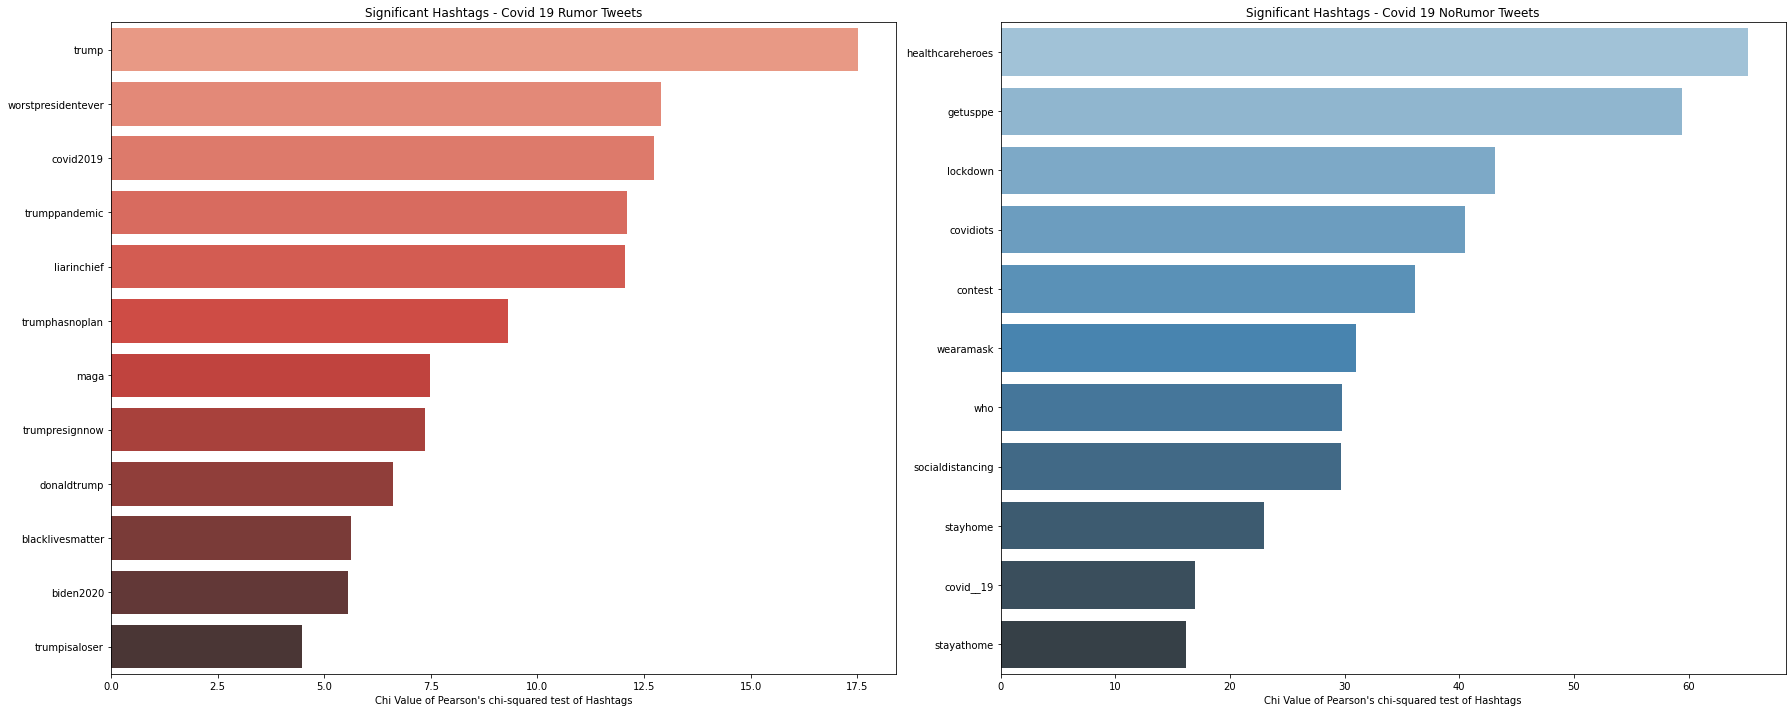

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(25,10))

sns.barplot(y=[i[0] for i in rmchi_sorted], x=[i[1] for i in rmchi_sorted], 
            orient='h', ax=ax[0], palette="Reds_d")

sns.barplot(y=[i[0] for i in nrchi_sorted], x=[i[1] for i in nrchi_sorted], 
            orient='h', ax=ax[1], palette="Blues_d")

ax[0].set_title(f"Significant Hashtags - Covid 19 Rumor Tweets")
ax[0].set_xlabel("Chi Value of Pearson's chi-squared test of Hashtags")
ax[1].set_title(f"Significant Hashtags - Covid 19 NoRumor Tweets")
ax[1].set_xlabel("Chi Value of Pearson's chi-squared test of Hashtags")
plt.tight_layout()
plt.show()

# hashtag trend

How do covid rumor hashtags evolve over time?

## split

In [ ]:
print(f'English rumor number: {len(covid_rm)}, English no rumor number: {len(covid_nr)}')

English rumor number: 35895, English no rumor number: 165595


In [ ]:
timestamp_list = covid_en_df["timestamp"].values.tolist()

In [ ]:
print(len(timestamp_list))
import math
min1 = math.inf
max1 = -math.inf
for timestamp in timestamp_list:
  if timestamp<min1:
    min1 = timestamp
  elif timestamp > max1:
    max1 = timestamp
print(f"Start Time is {datetime.datetime.fromtimestamp(min1)}, End time is {datetime.datetime.fromtimestamp(max1)}.")

201490
Start Time is 2020-01-09 00:44:04, End time is 2020-08-01 18:56:19.


In [ ]:
# time interval of spliting

from pandas._libs.tslibs.timestamps import Timestamp
def get_timestamp_ymd(time_str):
    return time.mktime(datetime.datetime.strptime(time_str, "%Y-%m-%d").timetuple())

TIME_LIST=['2020-01-01', '2020-03-10', '2020-05-10', '2020-06-25', '2020-08-02']

TIMESTAMP_LIST = [get_timestamp_ymd(i) for i in TIME_LIST]
print(TIME_LIST)
print(TIMESTAMP_LIST)

['2020-01-01', '2020-03-10', '2020-05-10', '2020-06-25', '2020-08-02']
[1577836800.0, 1583798400.0, 1589068800.0, 1593043200.0, 1596326400.0]


In [ ]:
def get_intervaled_hashtag(df, il):
  tilist = [(il[i], il[i+1]) for i in range(len(il)-1)]
  df_itlist = []
  for (s, e) in tilist:
    df1 = df.loc[df["timestamp"]<e]
    df2 = df1.loc[df1["timestamp"]>s]
    df_itlist.append(df2)
  return df_itlist

In [ ]:
covid_iterval_list = get_intervaled_hashtag(covid_en_df, TIMESTAMP_LIST)
covid_rm_iterval_list = get_intervaled_hashtag(covid_rm, TIMESTAMP_LIST)
covid_nr_iterval_list = get_intervaled_hashtag(covid_nr, TIMESTAMP_LIST)

### trends from interval 1 

In [ ]:
INTERVAL = 0
print(f'{TIME_LIST[INTERVAL]} to {TIME_LIST[INTERVAL+1]}')

hashtag_itlist = covid_iterval_list[INTERVAL]["hashtags"].values.tolist()
rm_hashtag_itlist = covid_rm_iterval_list[INTERVAL]["hashtags"].values.tolist()
nr_hashtag_itlist = covid_nr_iterval_list[INTERVAL]["hashtags"].values.tolist()

hashtag_itdict = to_hashtag_dict(hashtag_itlist)
rm_hashtag_itdict = to_hashtag_dict(rm_hashtag_itlist)
nr_hashtag_itdict = to_hashtag_dict(nr_hashtag_itlist)

hashtag_itdict = pop_hashtag(hashtag_itdict)
rm_hashtag_itdict = pop_hashtag(rm_hashtag_itdict)
nr_hashtag_itdict = pop_hashtag(nr_hashtag_itdict)

hashtag_it_popless = pop_less(hashtag_itdict, threshold=20)
rumor_hashtag_it_popless = pop_except_list(rm_hashtag_itdict, list(hashtag_it_popless.keys()))
norumor_hashtag_it_popless = pop_except_list(nr_hashtag_itdict, list(hashtag_it_popless.keys()))

assert len(list(rumor_hashtag_it_popless.keys())) == len(list(hashtag_it_popless.keys()))
assert len(list(norumor_hashtag_it_popless.keys())) == len(list(hashtag_it_popless.keys()))

rmdict_it_chi, nrdict_it_chi = freq_diff(rumor_hashtag_it_popless, norumor_hashtag_it_popless, hashtag_it_popless)
rmchi_it_sorted = [[item[0], item[1]] for item in sorted(rmdict_it_chi.items(), key=lambda item: item[1], reverse=True)] 
nrchi_it_sorted = [[item[0], item[1]] for item in sorted(nrdict_it_chi.items(), key=lambda item: item[1], reverse=True)] 

2020-01-01 to 2020-03-10


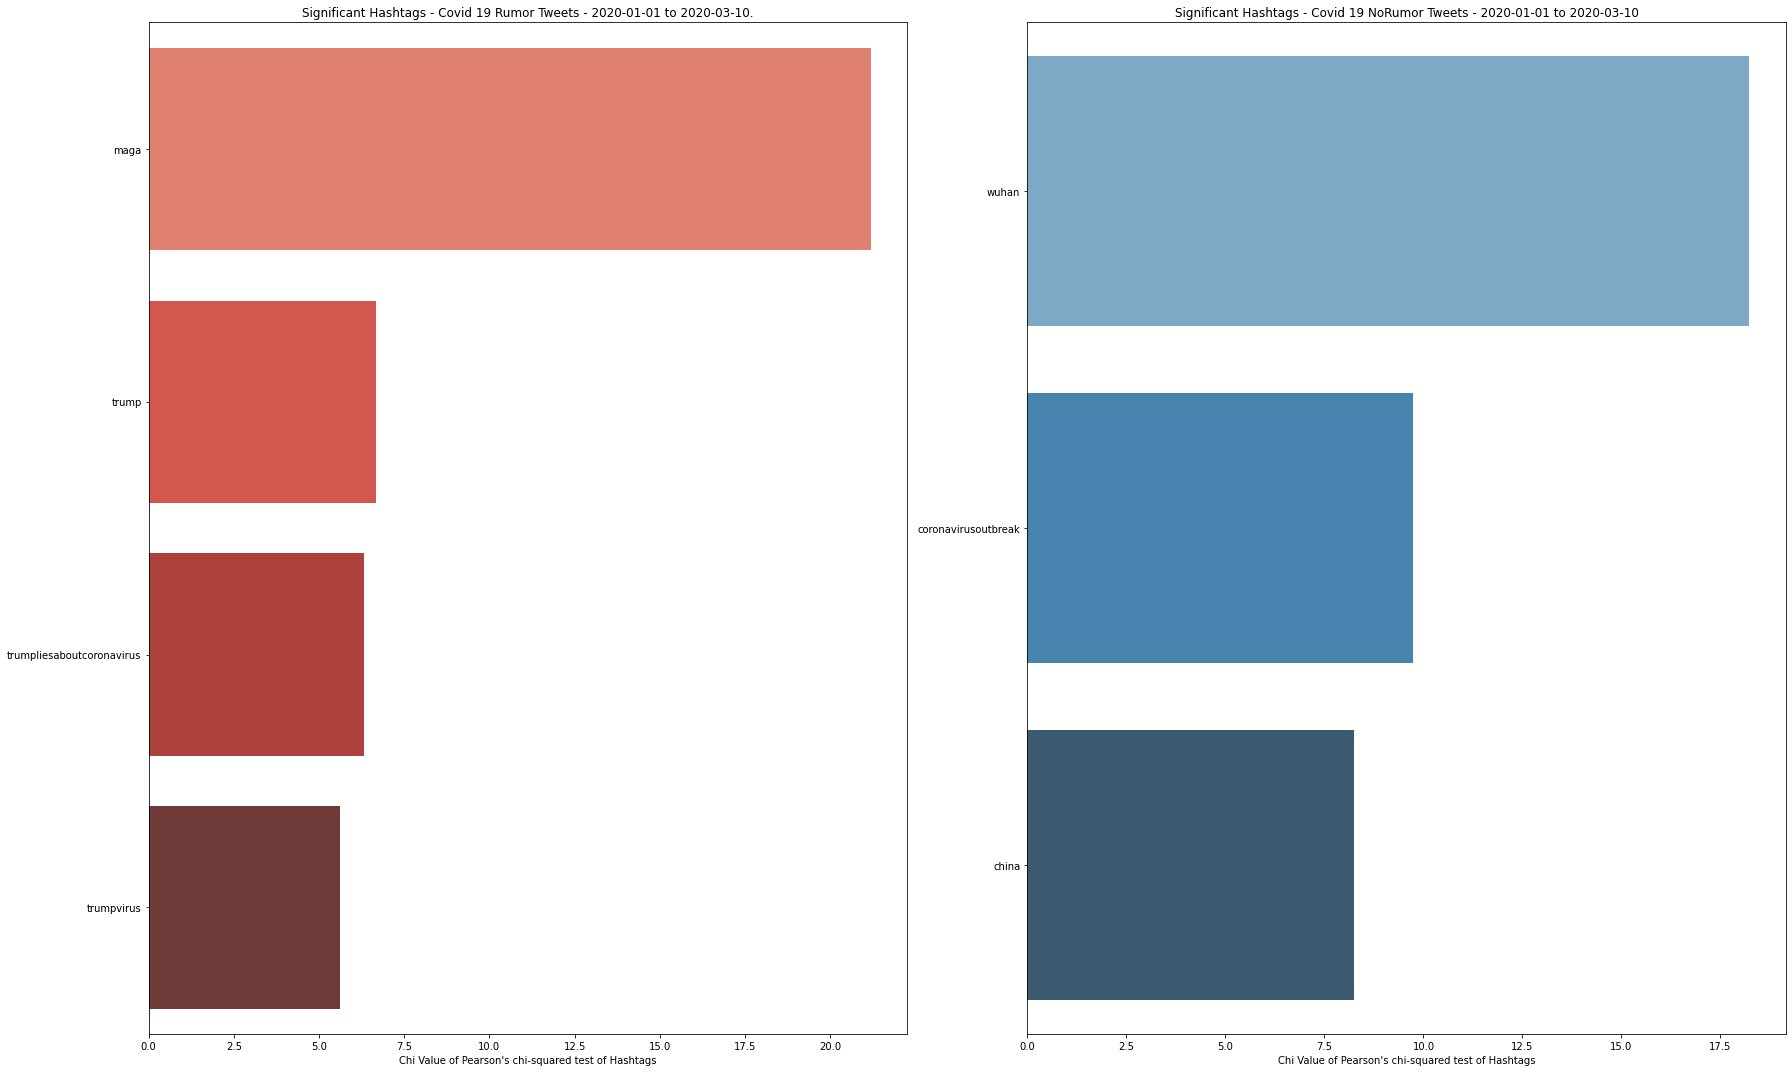

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(25,15))

sns.barplot(y=[i[0] for i in rmchi_it_sorted], x=[i[1] for i in rmchi_it_sorted], 
            orient='h', ax=ax[0], palette="Reds_d")

sns.barplot(y=[i[0] for i in nrchi_it_sorted], x=[i[1] for i in nrchi_it_sorted], 
            orient='h', ax=ax[1], palette="Blues_d")

ax[0].set_title(f"Significant Hashtags - Covid 19 Rumor Tweets - {TIME_LIST[INTERVAL]} to {TIME_LIST[INTERVAL+1]}.")
ax[0].set_xlabel("Chi Value of Pearson's chi-squared test of Hashtags")
ax[1].set_title(f"Significant Hashtags - Covid 19 NoRumor Tweets - {TIME_LIST[INTERVAL]} to {TIME_LIST[INTERVAL+1]}")
ax[1].set_xlabel("Chi Value of Pearson's chi-squared test of Hashtags")
plt.tight_layout()
plt.show()

In [ ]:
def trend_hashtag(interval_number, threshold=50, figsize=(25,15)):
  print(f'{TIME_LIST[interval_number]} to {TIME_LIST[interval_number+1]}')

  print(f'Total tweets number is {covid_iterval_list[interval_number].shape[0]}, Total rumor tweets number is {covid_rm_iterval_list[interval_number].shape[0]} and Total norumor tweets number is {covid_nr_iterval_list[interval_number].shape[0]}')

  hashtag_itlist = covid_iterval_list[interval_number]["hashtags"].values.tolist()
  rm_hashtag_itlist = covid_rm_iterval_list[interval_number]["hashtags"].values.tolist()
  nr_hashtag_itlist = covid_nr_iterval_list[interval_number]["hashtags"].values.tolist()

  hashtag_itdict = to_hashtag_dict(hashtag_itlist)
  rm_hashtag_itdict = to_hashtag_dict(rm_hashtag_itlist)
  nr_hashtag_itdict = to_hashtag_dict(nr_hashtag_itlist)

  hashtag_itdict = pop_hashtag(hashtag_itdict)
  rm_hashtag_itdict = pop_hashtag(rm_hashtag_itdict)
  nr_hashtag_itdict = pop_hashtag(nr_hashtag_itdict)

  hashtag_it_popless = pop_less(hashtag_itdict, threshold)
  rumor_hashtag_it_popless = pop_except_list(rm_hashtag_itdict, list(hashtag_it_popless.keys()))
  norumor_hashtag_it_popless = pop_except_list(nr_hashtag_itdict, list(hashtag_it_popless.keys()))

  assert len(list(rumor_hashtag_it_popless.keys())) == len(list(hashtag_it_popless.keys()))
  assert len(list(norumor_hashtag_it_popless.keys())) == len(list(hashtag_it_popless.keys()))

  rmdict_it_chi, nrdict_it_chi = freq_diff(rumor_hashtag_it_popless, norumor_hashtag_it_popless, hashtag_it_popless)
  rmchi_it_sorted = [[item[0], item[1]] for item in sorted(rmdict_it_chi.items(), key=lambda item: item[1], reverse=True)] 
  nrchi_it_sorted = [[item[0], item[1]] for item in sorted(nrdict_it_chi.items(), key=lambda item: item[1], reverse=True)] 

  fig, ax = plt.subplots(1,2, figsize=figsize)

  sns.barplot(y=[i[0] for i in rmchi_it_sorted], x=[i[1] for i in rmchi_it_sorted], 
            orient='h', ax=ax[0], palette="Reds_d")

  sns.barplot(y=[i[0] for i in nrchi_it_sorted], x=[i[1] for i in nrchi_it_sorted], 
            orient='h', ax=ax[1], palette="Blues_d")

  ax[0].set_title(f"Significant Hashtags - Covid 19 Rumor Tweets - {TIME_LIST[interval_number]} to {TIME_LIST[interval_number+1]}.")
  ax[0].set_xlabel("Chi Value of Pearson's chi-squared test of Hashtags")
  ax[1].set_title(f"Significant Hashtags - Covid 19 NoRumor Tweets - {TIME_LIST[interval_number]} to {TIME_LIST[interval_number+1]}")
  ax[1].set_xlabel("Chi Value of Pearson's chi-squared test of Hashtags")
  plt.tight_layout()
  plt.show()

  return rmdict_it_chi

## trend result of rumor and no rumor

2020-01-01 to 2020-03-10
Total tweets number is 11184, Total rumor tweets number is 4986 and Total norumor tweets number is 6198


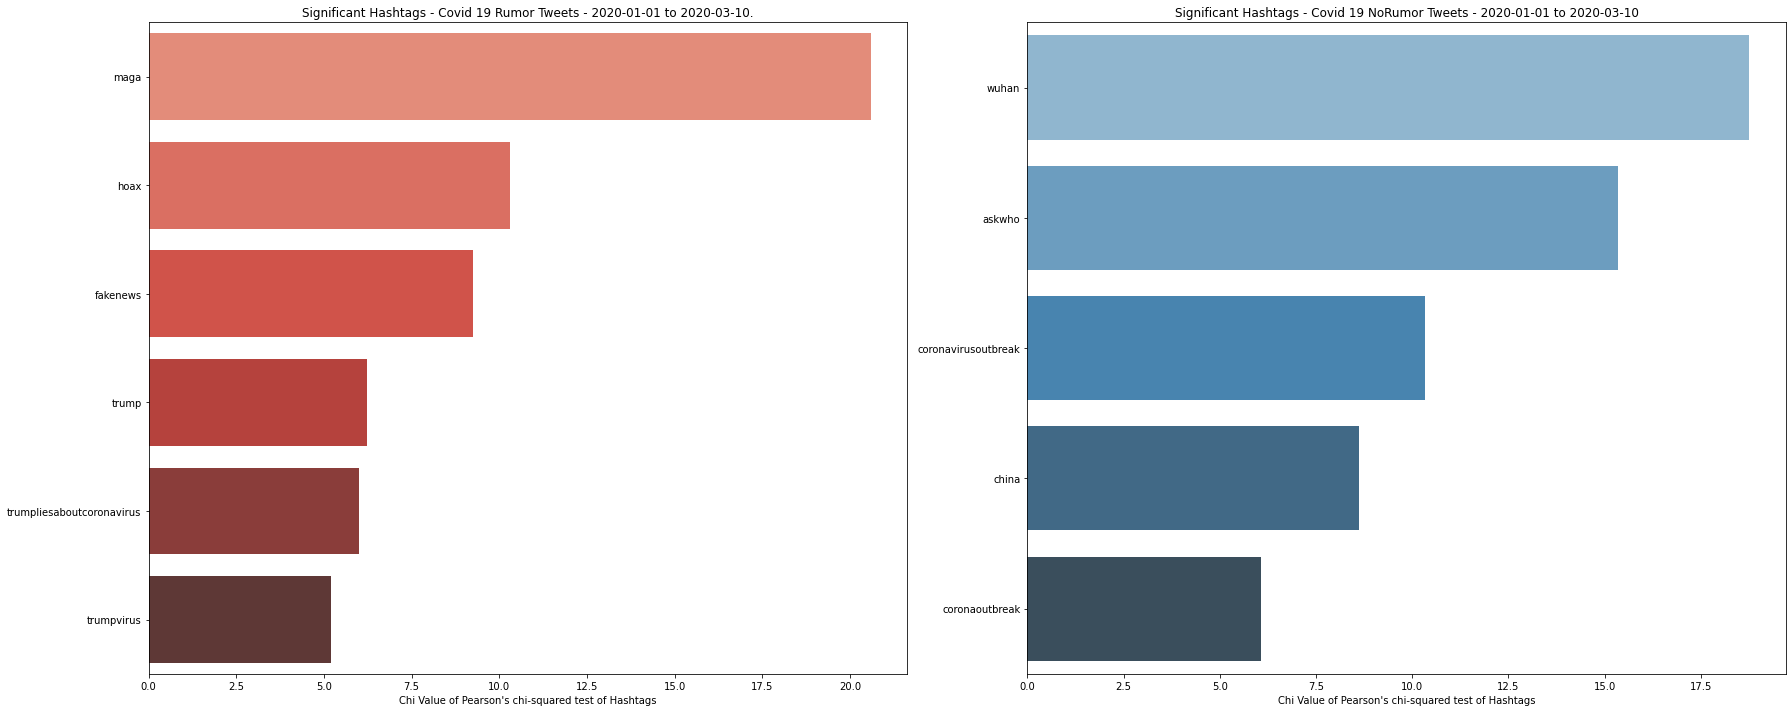

In [ ]:
rmdict_it_chi0 = trend_hashtag(0,15, figsize=(25,10))

2020-03-10 to 2020-05-10
Total tweets number is 84285, Total rumor tweets number is 13604 and Total norumor tweets number is 70681


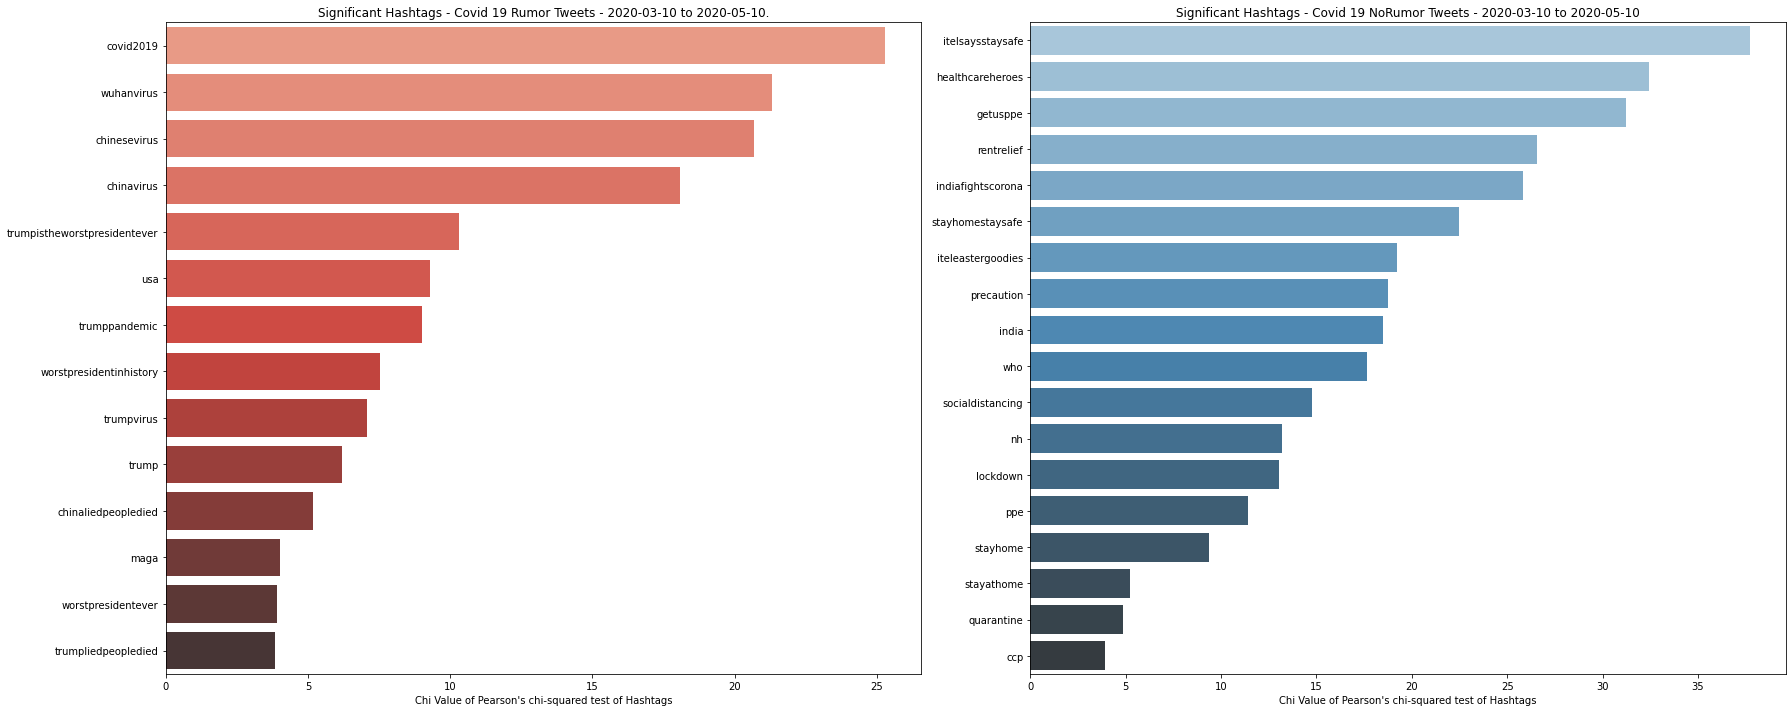

In [ ]:
rmdict_it_chi1 = trend_hashtag(1,75, figsize=(25,10))

2020-05-10 to 2020-06-25
Total tweets number is 66502, Total rumor tweets number is 11123 and Total norumor tweets number is 55379


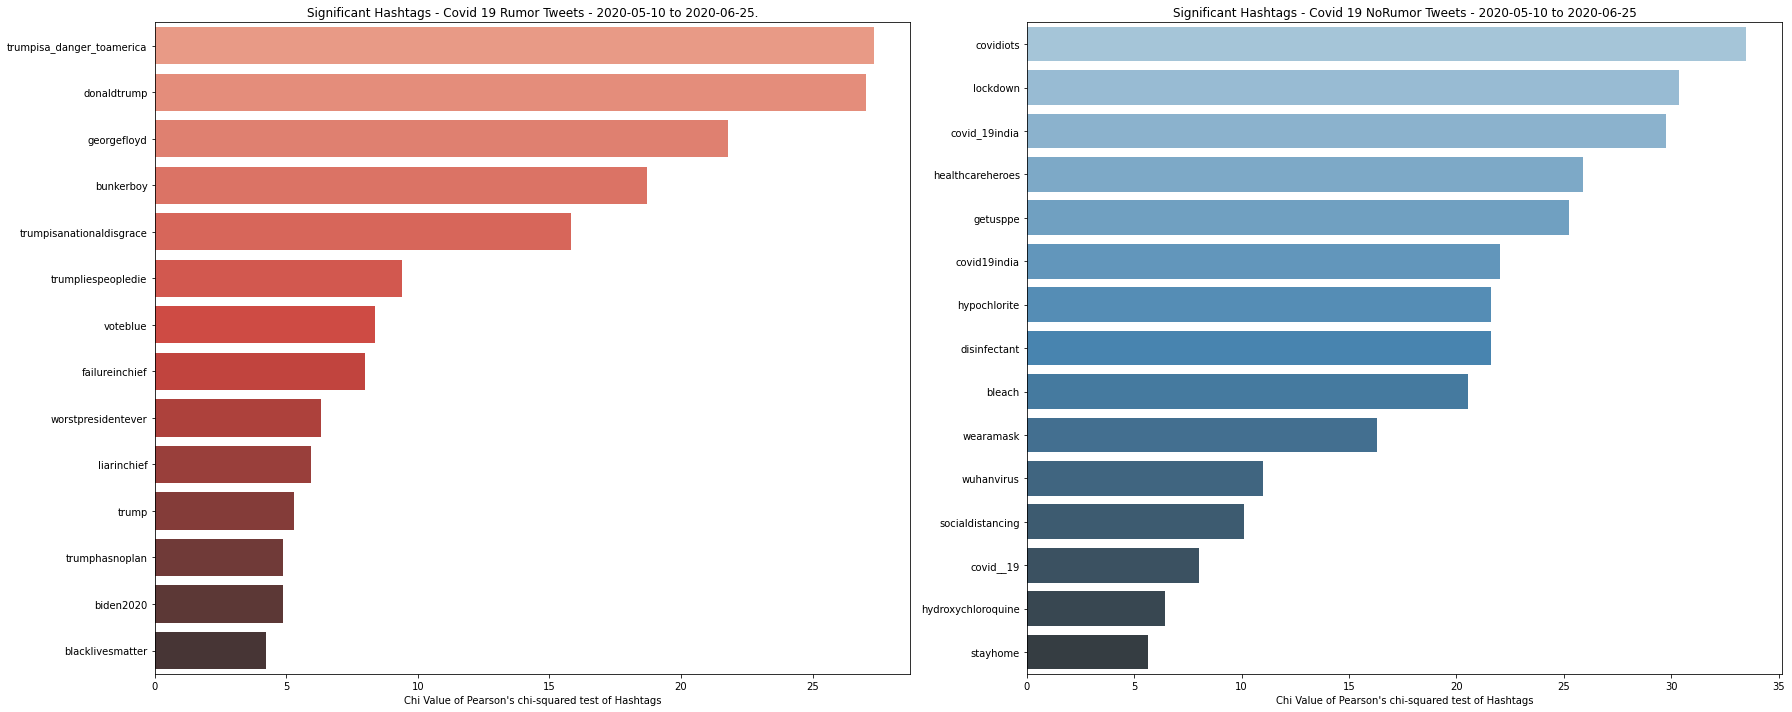

In [ ]:
rmdict_it_chi2 = trend_hashtag(2,75, figsize=(25,10))

2020-06-25 to 2020-08-02
Total tweets number is 39518, Total rumor tweets number is 6182 and Total norumor tweets number is 33336


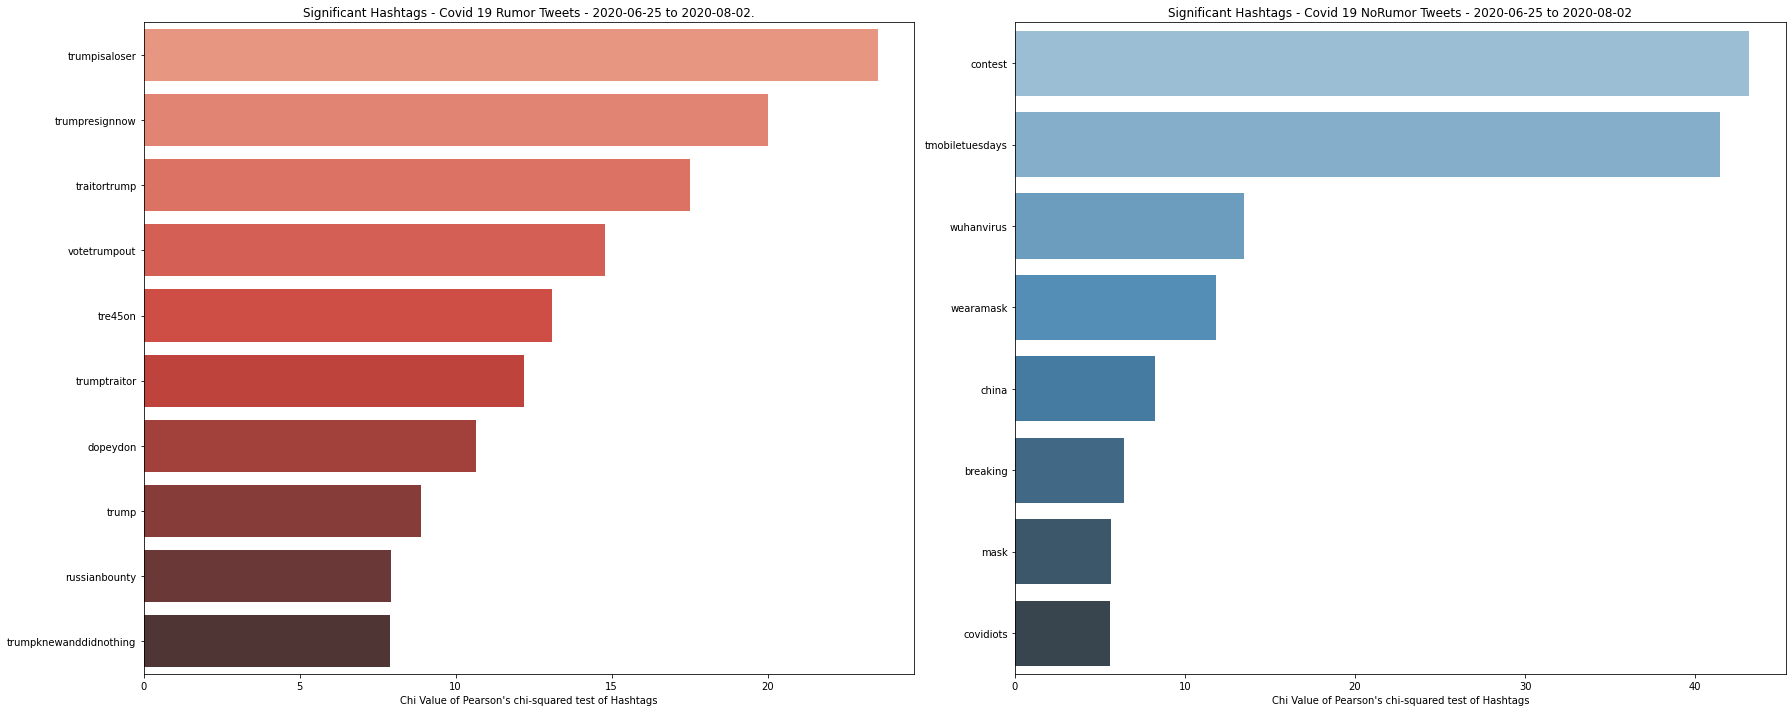

In [ ]:
rmdict_it_chi3 = trend_hashtag(3,50, figsize=(25,10))

## Trend of rumor

In [ ]:
set_all = list(set(rmdict_it_chi0.keys()) | set(rmdict_it_chi1.keys()) | set(rmdict_it_chi2.keys()) | set(rmdict_it_chi3.keys()))
trend_dict = defaultdict(list)
interval_label = ['Jan & Feb', 'Mar & Apr', 'May & Jun', 'Mid-Jun & July']
counter = 0
for dict_chi in [rmdict_it_chi0, rmdict_it_chi1, rmdict_it_chi2, rmdict_it_chi3]:
  for hashtag in set_all:
    if hashtag in dict_chi:
      trend_dict[interval_label[counter]].append(dict_chi[hashtag])
    else:
      trend_dict[interval_label[counter]].append(0)
  counter+=1


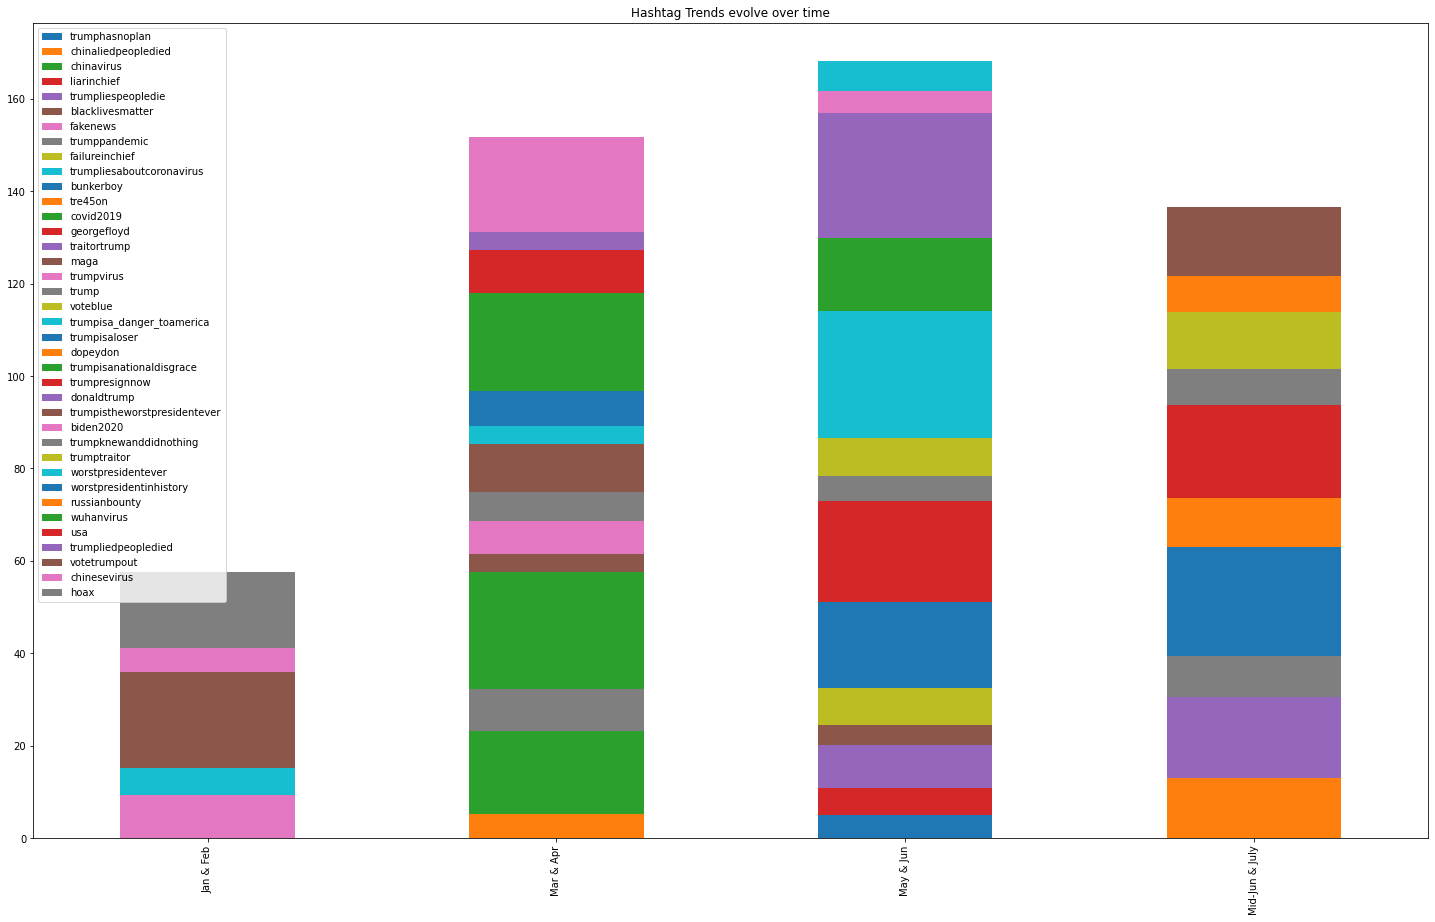

In [ ]:
trend_df = pd.DataFrame.from_dict(trend_dict, orient='index', columns=set_all)
trend_df.plot(kind='bar', stacked=True, title='Hashtag Trends evolve over time', figsize=(25,15))

# Topic

What are the topic of covid-19 rumor and norumors?

In [ ]:
print(f'English rumor number: {len(covid_rm)}, English no rumor number: {len(covid_nr)}')

English rumor number: 35895, English no rumor number: 165595


In [ ]:
from emoji import demojize
import string
import nltk
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords

In [ ]:
tokenizer = TweetTokenizer(preserve_case=False,
                           strip_handles=True,
                           reduce_len=True)

nltk.download('stopwords')
english_stopwords = stopwords.words("english")

def normalizeToken(token):
    lowercased_token = token.lower()
    if token.startswith("@"):
        return ""
    elif lowercased_token.startswith("http") or lowercased_token.startswith("www"):
        return ""
    elif len(token) == 1:
        return demojize(token)
    else:
        if token == "’":
            return "'"
        elif token == "…":
            return "..."
        else:
            return token
        
def remove_stopword(tokens):
#     english_stopwords.extend(['n\'t', 'covid', 'covid19'])
    return [word for word in tokens if (word not in english_stopwords and word not in string.punctuation)]

def normalizeTweet(tweet):
    tokens = tokenizer.tokenize(tweet.replace("’", "'").replace("…", "..."))
    normTweet = " ".join([normalizeToken(token) for token in tokens])

    normTweet = (
        normTweet.replace("cannot ", "can not ")
        .replace("n't ", " n't ")
        .replace("n 't ", " n't ")
        .replace("ca n't", "can't")
        .replace("ai n't", "ain't")
    )
    normTweet = (
        normTweet.replace("'m ", " 'm ")
        .replace("'re ", " 're ")
        .replace("'s ", " 's ")
        .replace("'ll ", " 'll ")
        .replace("'d ", " 'd ")
        .replace("'ve ", " 've ")
    )
    normTweet = (
        normTweet.replace(" p . m .", "  p.m.")
        .replace(" p . m ", " p.m ")
        .replace(" a . m .", " a.m.")
        .replace(" a . m ", " a.m ")
    )
    normTweet = (
        normTweet.replace("...", "")
        .replace("'s", "")
        .replace("n't", "")
        .replace("“ ”", "")
    )
    
    return remove_stopword(normTweet.split())
#     return ' '.join(normTweet.split())

def join_tokens(tokens):
    return ' '.join(tokens)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
normalizeTweet('According to the New York Times @Tim www.baidu.com')

['according', 'new', 'york', 'times']

In [ ]:
covid_en_df['normalized_tokens'] = covid_en_df['text'].apply(normalizeTweet)
covid_en_df['normalized_text'] = covid_en_df['normalized_tokens'].apply(join_tokens)

covid_rm = covid_en_df[covid_en_df.label=='1']
covid_nr = covid_en_df[covid_en_df.label=='0']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Visualization of all the words using word cloud

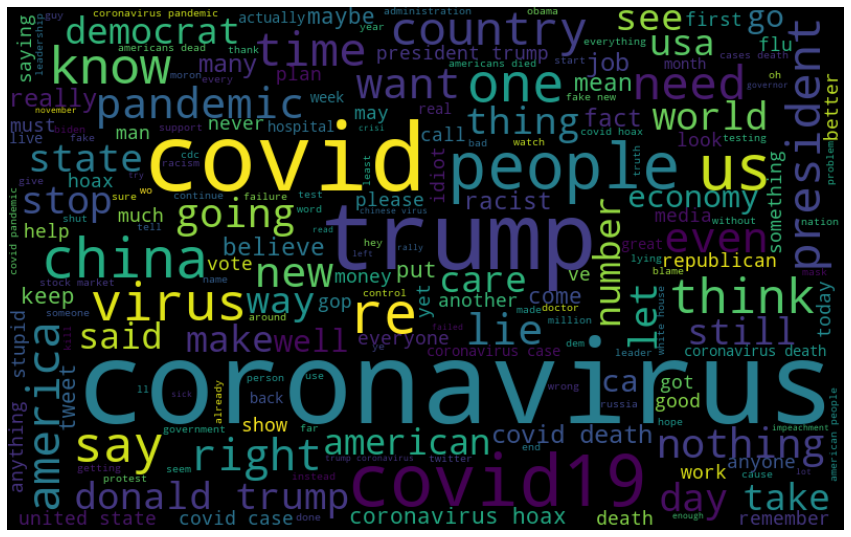

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud

rumor_all_word = ' '.join([text for text in covid_rm['normalized_text']])
rm_wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, max_words=200).generate(rumor_all_word) 
plt.figure(figsize=(15, 12)) 
plt.imshow(rm_wordcloud, interpolation="bilinear")
plt.axis('off') 
plt.show()

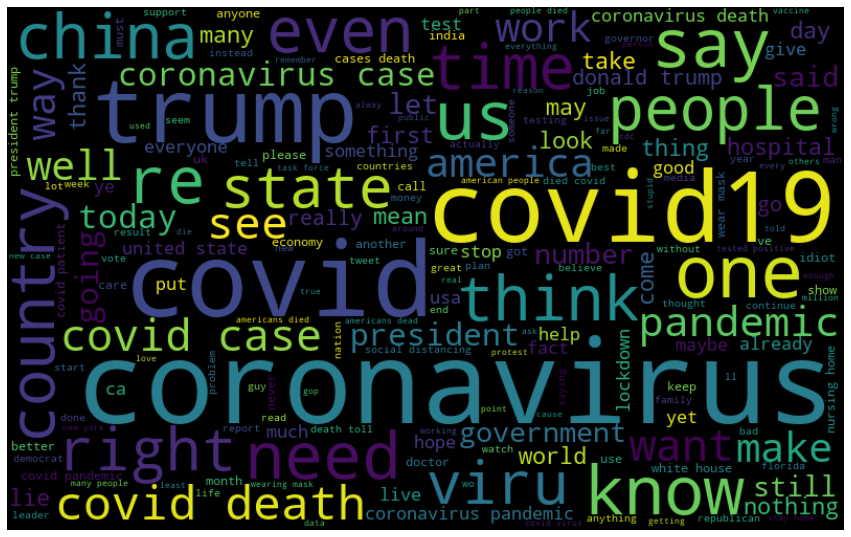

In [ ]:
norumor_all_word = ' '.join([text for text in covid_nr['normalized_text']])
nr_wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, max_words=200).generate(norumor_all_word) 
plt.figure(figsize=(15, 12)) 
plt.imshow(nr_wordcloud, interpolation="bilinear")
plt.axis('off') 
plt.show()

## Topic analysis

### Lemmatizer

In [ ]:
from nltk.stem import WordNetLemmatizer

In [ ]:
lemmatizer = WordNetLemmatizer()

def lemma_tokenlist(tokens):
    tl = []
    for token in tokens:
        tl.append(lemmatizer.lemmatize(token))
    return tl

In [ ]:
covid_en_df['lemma_tokens'] = covid_en_df['normalized_tokens'].apply(lemma_tokenlist)
covid_en_df['lemmas_back_to_text'] = covid_en_df['lemma_tokens'].apply(join_tokens)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Topic Base Model

In [ ]:
from gensim.corpora import Dictionary
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel
from sklearn.model_selection import GridSearchCV
import pyLDAvis.gensim_models

In [ ]:
# Create a id2word dictionary
covid_rm = covid_en_df[covid_en_df.label=='1']
covid_nr = covid_en_df[covid_en_df.label=='0']

rm_id2word = Dictionary(covid_rm['lemma_tokens'])
print(len(rm_id2word))

# Filtering Extremes
rm_id2word.filter_extremes(no_below=2, no_above=.99)
print(len(rm_id2word))

31825
15066


In [ ]:
# Creating a corpus object 
rm_corpus = [rm_id2word.doc2bow(d) for d in covid_rm['lemma_tokens']]

In [ ]:
# Timing Start
import re

rm_base_model_program_start_time = time.time()

# Instantiating a LDA model 
rm_base_model = LdaMulticore(corpus=rm_corpus,
                       id2word=rm_id2word,
                       num_topics=50,
                       random_state=42,
                       chunksize=2000,
                       passes=25,
                       decay=0.5,
                       iterations=70,
                       workers=3)

# Timing End
base_model_program_end_time = time.time()

#Printing First Model Time
base_model_runtime = round(base_model_program_end_time - base_model_program_start_time, 2)
print(base_model_runtime)

# Filtering for words 
rm_words = [re.findall(r'"([^"]*)"',t[1]) for t in rm_base_model.print_topics()]

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

182.43


In [ ]:
# Create Topics
rm_topics = [' '.join(t) for t in rm_words]

# Getting the topics
for id, t in enumerate(rm_topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
control dr february fauci disease coronavirus went u march trump

------ Topic 1 ------
covid 19 family one like many know life lost would

------ Topic 2 ------
“ ” 🇺 🇸 coronavirus trump :folded_hands: say :police_car_light: fine

------ Topic 3 ------
said remember coronavirus would doctor big trump worry say deal

------ Topic 4 ------
usa blame coronavirus trump dems rest president handle pelosi nancy

------ Topic 5 ------
case number new covid 19 death infection :rolling_on_the_floor_laughing: u record

------ Topic 6 ------
good safe thanks 100 joke coronavirus smart keep current dont

------ Topic 7 ------
market bad coronavirus trump stock obama threat handling pandemic president

------ Topic 8 ------
died due american people many #covid19 mass losing #trumpliespeopledie done

------ Topic 9 ------
hoax coronavirus democrat called trump call said democratic calling president

------ Topic 10 ------
.. pay #wuhanvirus panic coronavirus use #chinesevirus w

In [ ]:
# Compute Perplexity
# a measure of how good the model is. lower the better
rm_base_perplexity = rm_base_model.log_perplexity(rm_corpus)
print('\nPerplexity: ', rm_base_perplexity) 

# Compute Coherence Score
rm_coherence_model = CoherenceModel(model=rm_base_model, texts=covid_rm['lemma_tokens'], 
                                   dictionary=rm_id2word, coherence='c_v')
rm_coherence_lda_model_base = rm_coherence_model.get_coherence()
print('\nCoherence Score: ', rm_coherence_lda_model_base)


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt


Perplexity:  -8.216797843083452


/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for


Coherence Score:  0.36592193274861706


In [ ]:
#Creating Topic Distance Visualization 
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(rm_base_model, rm_corpus, rm_id2word)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
51     0.300733  0.035131       1        1  4.767831
48     0.195366 -0.087855       2        1  2.589139
39     0.150432  0.104488       3        1  2.527127
63    -0.038016  0.119289       4        1  2.485394
60     0.102617 -0.011307       5        1  2.165721
...         ...       ...     ...      ...       ...
66    -0.048564 -0.186141      64        1  0.916612
18    -0.028465 -0.191900      65        1  0.905920
64     0.170601 -0.051910      66        1  0.886289
2     -0.057575 -0.049059      67        1  0.882669
26    -0.027334 -0.037402      68        1  0.875582

[68 rows x 5 columns], topic_info=              Term          Freq         Total Category  logprob  loglift
17           covid  11719.000000  11719.000000  Default  30.0000  30.0000
12              19  11688.000000  11688.000000  Default  29.0000  29.0000
53    #coronavirus   2643.000000   2643.000000  Default  28.0000  28.0000
299          death   3637.000000   3637.000000  Default  27.0000  27.0000
257       american   4177.000000   4177.000000  Default  26.0000  26.0000
...            ...           ...           ...      ...      ...      ...
1439     suffering     75.762331    129.581725  Topic68  -4.1298   4.2013
37     coronavirus    148.782807  14928.538142  Topic68  -3.4549   0.1295
321        economy     48.333897    909.843501  Topic68  -4.5793   1.8029
50           trump     33.991765   9385.141238  Topic68  -4.9313  -0.8827
240          going     31.961526   1419.459906  Topic68  -4.9929   0.9445

[3614 rows x 6 columns], token_table=       Topic      Freq               Term
term                                     
252       10  0.937506     #25thamendment
3868      56  0.978616  #25thamendmentnow
8844       1  0.895854            #70days
8844      28  0.052697            #70days
11650     50  0.917338            #amazon
...      ...       ...                ...
6652      21  0.949399                  🇦
5884      39  0.964691                  🇳
9376      29  0.945356                  🇷
733       29  0.995117                  🇸
734       29  0.997548                  🇺

[8325 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[52, 49, 40, 64, 61, 6, 45, 53, 17, 62, 32, 30, 68, 10, 47, 2, 54, 57, 12, 11, 35, 16, 31, 37, 50, 58, 22, 34, 59, 60, 9, 25, 1, 66, 43, 7, 20, 23, 14, 36, 39, 4, 46, 29, 8, 44, 5, 51, 24, 38, 63, 48, 15, 33, 55, 28, 21, 56, 42, 18, 26, 41, 13, 67, 19, 65, 3, 27])

In [ ]:
nr_id2word = Dictionary(covid_nr['lemma_tokens'])
print(len(nr_id2word))

# Filtering Extremes
nr_id2word.filter_extremes(no_below=2, no_above=.99)
print(len(nr_id2word))

# Creating a corpus object 
nr_corpus = [nr_id2word.doc2bow(d) for d in covid_nr['lemma_tokens']]

89134
38958


In [ ]:
# Timing Start
import re

base_model_program_start_time = time.time()

# Instantiating a LDA model 
nr_base_model = LdaMulticore(corpus=nr_corpus,
                       id2word=nr_id2word,
                       num_topics=50,
                       random_state=42,
                       chunksize=2000,
                       passes=25,
                       decay=0.5,
                       iterations=70,
                       workers=3)

# Timing End
base_model_program_end_time = time.time()

#Printing First Model Time
base_model_runtime = round(base_model_program_end_time - base_model_program_start_time, 2)
print(base_model_runtime)

# Filtering for words 
nr_words = [re.findall(r'"([^"]*)"',t[1]) for t in nr_base_model.print_topics()]

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

643.63


In [ ]:
# Create Topics
nr_topics = [' '.join(t) for t in nr_words]

# Getting the topics
for id, t in enumerate(nr_topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
2 week month 1 3 two data ago 4 day

------ Topic 1 ------
way 'm coronavirus 'll sure would long think 'd best

------ Topic 2 ------
health public house coronavirus white cdc pandemic official expert :rolling_on_the_floor_laughing:

------ Topic 3 ------
control political party coming left biden racist joe allowed coronavirus

------ Topic 4 ------
.. lockdown india govt pm taken country time measure #covid19

------ Topic 5 ------
china #covid19 #coronaviruspandemic change chinese world liar #wuhanvirus doubt criminal

------ Topic 6 ------
fighting pas politics game enemy supposed play anymore none target

------ Topic 7 ------
testing plan state government coronavirus need federal national response lack

------ Topic 8 ------
believe penny looking lose reality fool stopped happening seeing expect

------ Topic 9 ------
coronavirus america look like much leader better bad country good

------ Topic 10 ------
death million world u case usa dr population fauci p